In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import torch
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from Scripts.DataManager.GraphConstructor.CoOccurrenceGraphConstructor import CoOccurrenceGraphConstructor

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
from Scripts.Configs.ConfigClass import Config
config = Config(r'E:\Darsi\Payan Name Arshad\Second Work\ColorIntelligence\Scripts\Configs\Config.json')
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx

In [10]:
train_df = pd.read_csv(r'E:\Darsi\Payan Name Arshad\Second Work\ColorIntelligence\data\Amazon-Review\train_sm.csv')
test_df = pd.read_csv(r'E:\Darsi\Payan Name Arshad\Second Work\ColorIntelligence\data\Amazon-Review\test_sm.csv')

In [11]:
train_df.columns = ['Polarity', 'Title', 'Review']
test_df.columns = ['Polarity', 'Title', 'Review']

In [12]:
train_df = train_df[['Polarity', 'Review']]
test_df = test_df[['Polarity', 'Review']]

In [13]:
graph_const = CoOccurrenceGraphConstructor(train_df['Review'][0], config)
print(graph_const.edge_index)

tensor([[ 0,  0,  0,  ..., 64, 64, 64],
        [11, 15, 16,  ..., 55, 57, 61]])


In [14]:
print(graph_const.graph)

Data(x=[65, 300], edge_index=[2, 532], edge_attr=[532])


{0: Text(0.6722517966114951, 0.01646710096530368, "'"),
 1: Text(-0.2629578110908476, 0.7301126379415533, 'of'),
 2: Text(-0.47522216376632725, -0.3980018831586572, 'opinino'),
 3: Text(0.05402672980827745, -0.9407421371341262, 'refuse'),
 4: Text(-0.16724583068281143, 0.6514073978771233, 'read'),
 5: Text(-0.5266340378278913, 0.6627401268168605, 'if'),
 6: Text(0.06697378214457864, -0.09260421822175784, 'listen'),
 7: Text(-0.17296019272668656, 0.44485939922343387, ','),
 8: Text(0.29128197154519797, 0.0038504331389449596, 'on'),
 9: Text(0.014720453606667482, 0.33200784090159613, 'write'),
 10: Text(0.268413280486634, -0.3920075270330983, 'price'),
 11: Text(-0.022758303939345855, 0.13786940737118736, 'be'),
 12: Text(0.20954134588721446, 0.298862628664056, 'that'),
 13: Text(0.25112546573960937, 0.560023001577427, 'would'),
 14: Text(0.2060552423785289, -0.4648632784609605, 'music'),
 15: Text(0.3073693517115369, 0.31385644236921467, 'I'),
 16: Text(0.8720208718788595, -0.2718994339

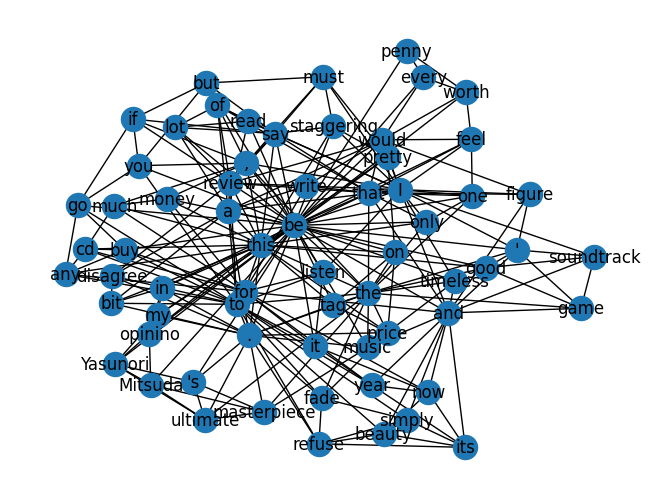

In [15]:
g = to_networkx(graph_const.graph, to_undirected=True)
layout = nx.spring_layout(g)
nx.draw(g, pos=layout)
unique_words_dict = {i: graph_const.unique_words[i] for i in range(len(graph_const.unique_words))}
nx.draw_networkx_labels(g, pos=layout, labels=unique_words_dict)

In [16]:
doc_graph.edge_index

NameError: name 'doc_graph' is not defined

In [17]:
len(graph_const.unique_words)

65

In [18]:
[(x,y) for x in range(3) for y in range(3) if x!=y]

[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]